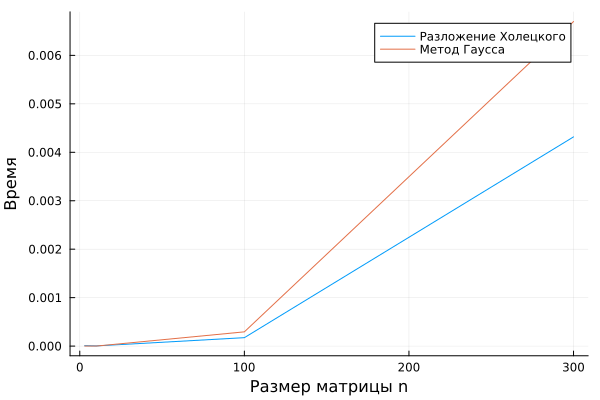

In [30]:
using LinearAlgebra
using Plots

function generate_symmetric_matrix(N)
    A = rand(N, N)
    return A * A'
end

function choletsky(A)
    N = size(A, 1)
    for I = 1:N
        S = A[I, I]
        for IP = 1:I-1
            S -= A[I, IP] * A[I, IP]
        end
        A[I, I] = sqrt(S)
        for J = I+1:N
            S = A[J, I]
            for IP = 1:I-1
                S -= A[I, IP] * A[J, IP]
            end
            A[J, I] = S / A[I, I]
        end
    end
    return A
end

function choletsky_solve(A::Matrix{Float64}, b::Vector{Float64})
    N = length(b)
    L = choletsky(copy(A))
    y = zeros(N)
    for i in 1:N
        y[i] = b[i] - sum(L[i, 1:i-1] .* y[1:i-1])
        y[i] /= L[i, i]
    end
    x = zeros(N)
    for i in N:-1:1
        x[i] = y[i] - sum(L[i+1:N, i] .* x[i+1:N])
        x[i] /= L[i, i]
    end
    return x
end

function gauss_solve_vector(A::Matrix{Float64}, b::Vector{Float64})
    n = length(b)
    M = copy(A)
    r = copy(b)
    for i in 1:n
        if M[i, i] == 0
            throw(ErrorException("Нулевой диагональный элемент в строке $i, метод без перестановок не применим."))
        end
        for k in (i+1):n
            if M[k, i] != 0
                factor = M[k, i] / M[i, i]
                for j in i:n
                    M[k, j] -= factor * M[i, j]
                end
                r[k] -= factor * r[i]
            end
        end
    end
    x = zeros(n)
    for i in n:-1:1
        x[i] = r[i]
        for k in (i+1):n
            x[i] -= M[i, k] * x[k]
        end
        if M[i, i] == 0
            throw(ErrorException("Матрица вырождена."))
        end
        x[i] /= M[i, i]
    end
    return x
end

sizes = [3, 10, 100, 300]
choletsky_times = Float64[]
gauss_times = Float64[]

for n in sizes
    A = generate_symmetric_matrix(n)
    b = rand(n)
    A_copy = copy(A)
    push!(choletsky_times, @elapsed choletsky_solve(copy(A), b))
    push!(gauss_times, @elapsed gauss_solve_vector(A, b))
end

plot(sizes, choletsky_times, label="Разложение Холецкого", xlabel="Размер матрицы n", ylabel="Время", legend=:topright)
plot!(sizes, gauss_times, label="Метод Гаусса", xlabel="Размер матрицы n", ylabel="Время", legend=:topright)
